In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import calendar as cal

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape

(8708, 9)

In [5]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [6]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
dtype: int64

In [7]:
df_train.weather.unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [8]:
df_train_Y = pd.read_csv('train_label.csv', header=None)

In [9]:
df_train_Y.shape

(8708, 1)

In [10]:
df_train_Y.head()

,0
0,504
1,5
2,139
3,209
4,184


## Feature Engineering

In [12]:
#for 
df_train['Date'] = df_train.datetime.apply(lambda x : x.split()[0])
df_train['Hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [13]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13


In [14]:
weekday = cal.day_name
df_train['Day'] = df_train.Date.apply(lambda x : cal.day_name[dt.datetime.strptime(x, "%m/%d/%Y").weekday()])
df_train['Month'] = df_train.Date.apply(lambda x : cal.month_name[dt.datetime.strptime(x, "%m/%d/%Y").month])

In [15]:
df_train.nunique() < 25

datetime      False
season         True
holiday        True
workingday     True
weather        True
temp          False
atemp         False
humidity      False
windspeed     False
Date          False
Hour           True
Day            True
Month          True
dtype: bool

In [16]:
lst = ['season', 'holiday', 'workingday','weather', 'Day', 'Hour', 'Month']

In [17]:
for item in lst:
    df_train[item] = df_train[item].astype('category')

In [18]:
df_train.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
Date            object
Hour          category
Day           category
Month         category
dtype: object

In [19]:
df = df_train.join(df_train_Y)

In [33]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184


In [32]:
df = df.rename(columns={0:"Bookings"})

In [21]:
df.describe()

,temp,atemp,humidity,windspeed,0
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,20.243020,23.655552,61.649173,12.843891,193.007005
std,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
datetime      8708 non-null object
season        8708 non-null category
holiday       8708 non-null category
workingday    8708 non-null category
weather       8708 non-null category
temp          8708 non-null float64
atemp         8708 non-null float64
humidity      8708 non-null int64
windspeed     8708 non-null float64
Date          8708 non-null object
Hour          8708 non-null category
Day           8708 non-null category
Month         8708 non-null category
0             8708 non-null int64
dtypes: category(7), float64(3), int64(2), object(2)
memory usage: 538.0+ KB


## Number of Bookings vs Seasons

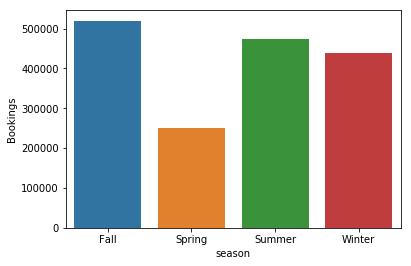

In [34]:
sns.barplot(x=df['season'], y='Bookings', data=df, estimator=sum, ci=None)

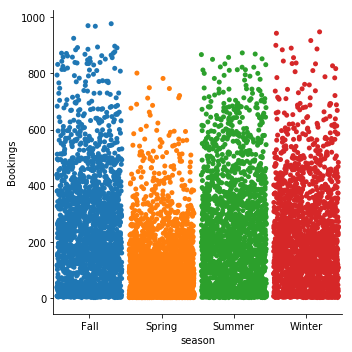

In [131]:
#sns.catplot(x=df['season'], y='Bookings', data=df,estimator=sum, jitter='0.45')
sns.catplot(x='season', y='Bookings', data=df, jitter='0.45')

In [36]:
'''df.season.value_counts().plot(kind='pie', figsize=(7,7))
plt.title("Distribution of Data on the basis of Season")
plt.show()'''

'df.season.value_counts().plot(kind=\'pie\', figsize=(7,7))\nplt.title("Distribution of Data on the basis of Season")\nplt.show()'

## Number of Bookings vs Holiday

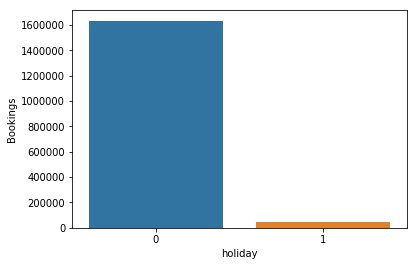

In [37]:
sns.barplot(x=df['holiday'], y='Bookings', data=df, estimator=sum, ci=None)

## Number of Bookings vs WorkingDay

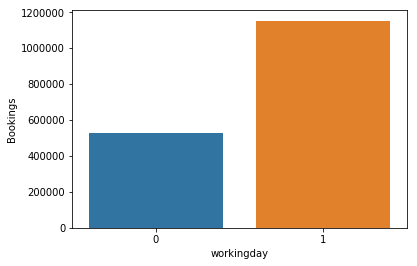

In [38]:
sns.barplot(x=df['workingday'], y='Bookings', data=df, estimator=sum, ci=None)

## Number of Bookings vs Date

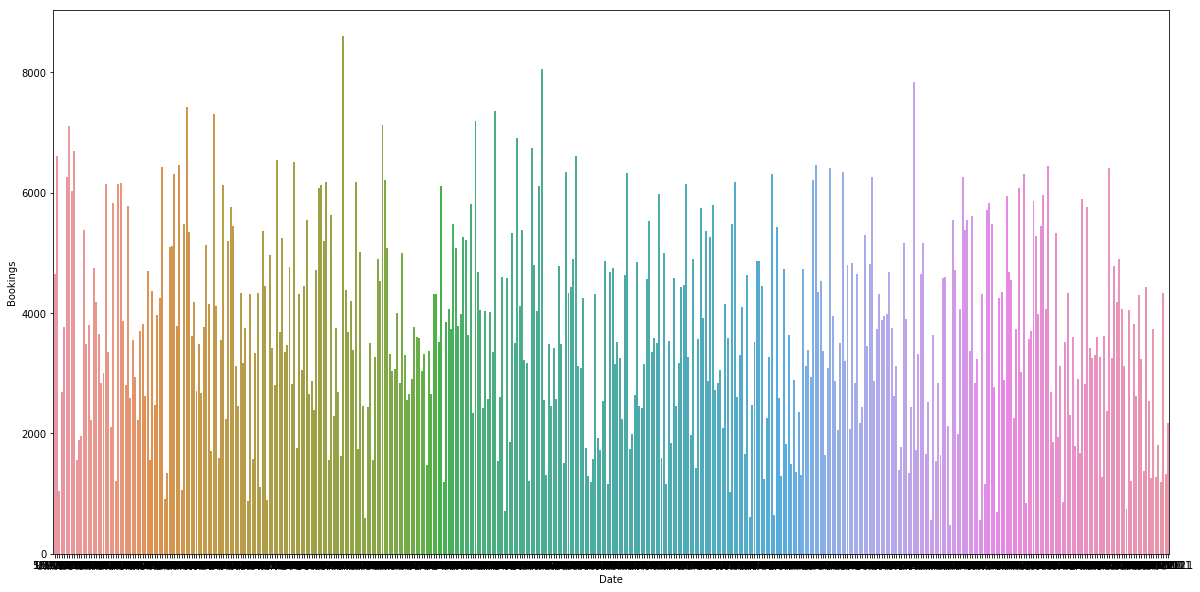

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Date'], y='Bookings', data=df, estimator=sum, ci=None)

## Number of Bookings vs Day

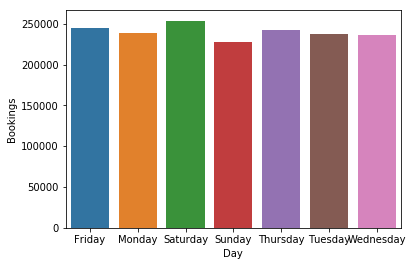

In [40]:
sns.barplot(x=df['Day'], y='Bookings', data=df, estimator=sum, ci=None)

## Number of Bookings vs Month

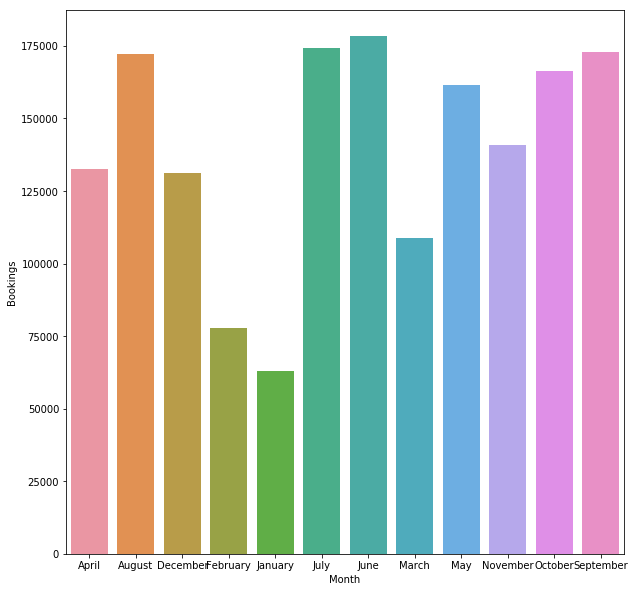

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['Month'], y='Bookings', data=df, estimator=sum, ci=None)

## Number of Bookings vs Weather

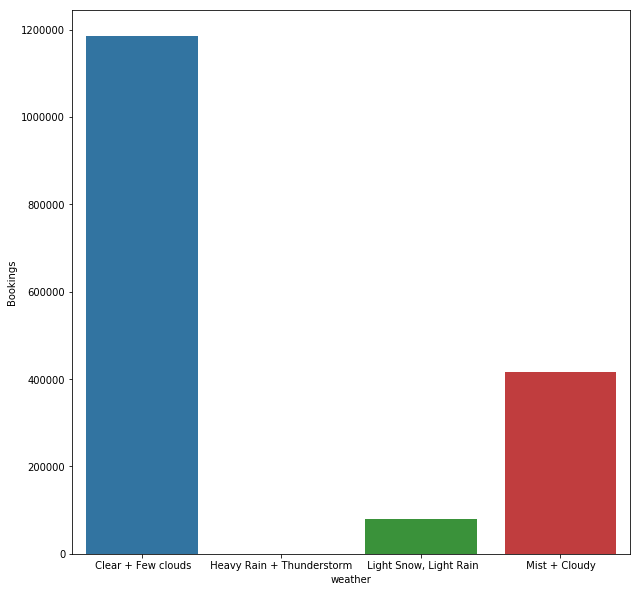

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['weather'], y='Bookings', data=df, estimator=sum, ci=None)

In [136]:
df['newCombine1'] = ((df.weather != "Heavy Rain + Thunderstorm") & (df.holiday != 1))*1

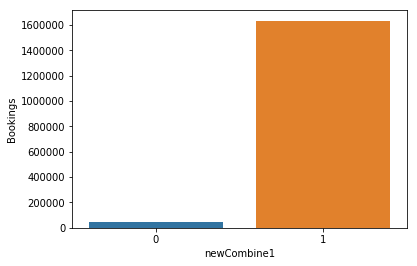

In [144]:
#plt.figure(figsize=(10,10))
sns.barplot(x=df['newCombine1'], y='Bookings', data=df, estimator=sum, ci=None)

In [43]:
df.Bookings.describe()

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Bookings, dtype: float64

## Details of Highest Booking Number

In [44]:
df[df.Bookings == 977]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
566,9/12/2012 18:00,Fall,0,1,Clear + Few clouds,27.06,31.06,44,16.9979,9/12/2012,18,Wednesday,September,977


In [45]:
stdDf = np.std(df.Bookings)

In [46]:
varDf = np.var(df.Bookings)

In [47]:
meanDf = np.mean(df.Bookings)

In [48]:
UpRangeDf = meanDf + 3*stdDf
LoRangeDf = meanDf - 3*stdDf

In [49]:
print('Range of Values: ', LoRangeDf, ' To ', UpRangeDf)

Range of Values:  -351.6183535684527  To  737.6323636741026


In [50]:
df.corr()

,temp,atemp,humidity,windspeed,Bookings
temp,1.000000,0.984035,-0.066419,-0.027824,0.397456
atemp,0.984035,1.000000,-0.044206,-0.068911,0.392754
humidity,-0.066419,-0.044206,1.000000,-0.320346,-0.307982
windspeed,-0.027824,-0.068911,-0.320346,1.000000,0.092090
Bookings,0.397456,0.392754,-0.307982,0.092090,1.000000


In [51]:
q1, q3= np.percentile(df.Bookings,[25,75])

In [52]:
q1

43.0

In [53]:
q3

286.0

In [54]:
iqr = q3 - q1
iqr

243.0

In [55]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print('Range of Values: ', lower_bound, ' To ', upper_bound)

Range of Values:  -321.5  To  650.5


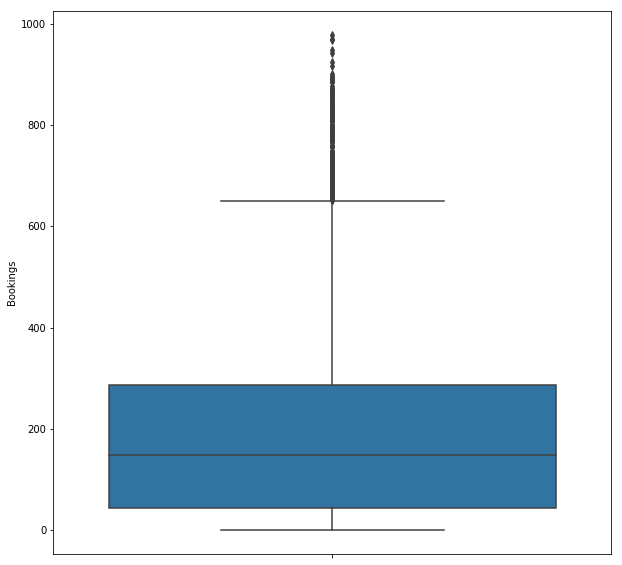

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df.Bookings)

In [60]:
from scipy import stats

In [67]:
z = np.abs(stats.zscore(df.Bookings))

8708

In [147]:
outliers1 = ((df['Bookings'] < (lower_bound)) | (df['Bookings'] > (UpRangeDf))).value_counts()
outliers1

False    8591
True      117
Name: Bookings, dtype: int64

In [75]:
df.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,8/17/2012,17,Friday,August,791
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,10/6/2012,9,Saturday,October,395


In [77]:
outliers2 = ((df['Bookings'] < (LoRangeDf)) | (df['Bookings'] > (UpRangeDf))).value_counts()
outliers2

False    8591
True      117
Name: Bookings, dtype: int64

In [82]:
df_O1 = df[df.Bookings < UpRangeDf]
df_O1.shape

(8591, 14)

In [83]:
df_O1.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,10/6/2012,9,Saturday,October,395
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,9/10/2012,4,Monday,September,5


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
labelEnc = LabelEncoder()

In [88]:
df_O_E = df_O1.apply(labelEnc.fit_transform)
df_O_E.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
8703,280,1,1,0,0,4,8,45,1,15,20,1,4,12
8704,1432,3,0,1,3,19,26,78,0,78,1,4,9,10
8705,4414,2,0,1,3,28,35,47,3,234,17,5,0,0
8706,2032,3,0,1,3,13,17,52,7,109,1,6,9,91
8707,41,1,0,1,3,6,7,41,9,2,2,1,4,30


In [100]:
corr = df_O_E.corr()
corr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
datetime,1.000000,-0.648615,-0.052126,0.012157,-0.044217,0.717642,0.697876,0.061999,-0.071683,0.999985,0.015536,-0.004710,-0.018238,0.164639
season,-0.648615,1.000000,-0.007945,0.008103,0.059614,-0.377630,-0.344509,0.058456,-0.002315,-0.647736,-0.008805,-0.006445,0.127704,0.005681
holiday,-0.052126,-0.007945,1.000000,-0.249202,0.003983,0.002136,-0.003346,-0.005876,0.011081,-0.051677,-0.001660,-0.148284,0.039660,0.004219
workingday,0.012157,0.008103,-0.249202,1.000000,0.017854,0.024083,0.018219,-0.002913,0.013122,0.012095,0.003467,0.206679,-0.020017,-0.019578
weather,-0.044217,0.059614,0.003983,0.017854,1.000000,-0.054287,-0.050320,0.336077,-0.035494,-0.044129,0.002661,0.038677,0.024298,-0.076416
temp,0.717642,-0.377630,0.002136,0.024083,-0.054287,1.000000,0.984432,-0.057364,-0.034730,0.718740,-0.137779,0.018050,0.119223,0.388717
atemp,0.697876,-0.344509,-0.003346,0.018219,-0.050320,0.984432,1.000000,-0.035556,-0.075138,0.698974,-0.132879,0.024312,0.129690,0.384829
humidity,0.061999,0.058456,-0.005876,-0.002913,0.336077,-0.057364,-0.035556,1.000000,-0.332375,0.061970,0.272973,0.054481,0.140104,-0.308328
windspeed,-0.071683,-0.002315,0.011081,0.013122,-0.035494,-0.034730,-0.075138,-0.332375,1.000000,-0.071703,-0.118685,0.019041,-0.056415,0.096707
Date,0.999985,-0.647736,-0.051677,0.012095,-0.044129,0.718740,0.698974,0.061970,-0.071703,1.000000,0.013456,-0.004695,-0.015359,0.165600


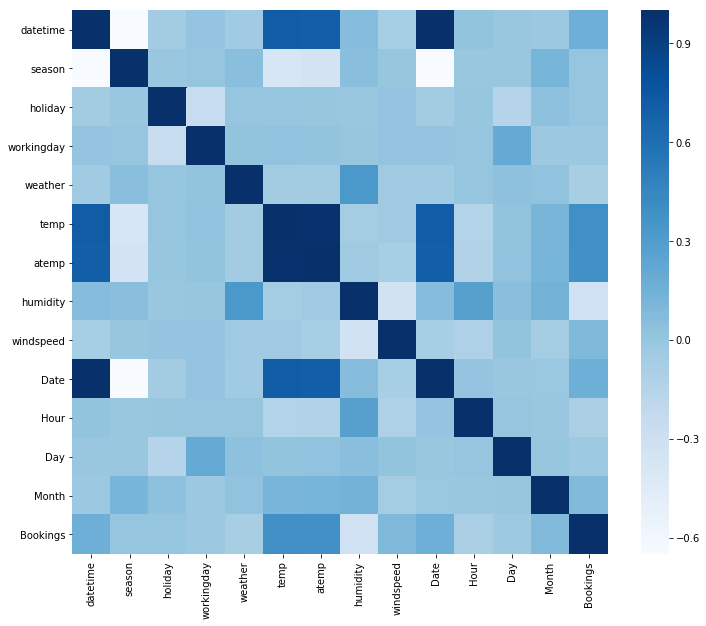

In [103]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='Blues', cbar_kws={"orientation" : "vertical"})

In [104]:
df_O_E.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,Hour,Day,Month,Bookings
count,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000,8591.000000
mean,4295.000000,1.507159,0.028867,0.676289,0.944942,23.559655,30.080317,52.786055,5.169945,227.701781,11.478175,2.981841,5.477011,182.951577
std,2480.152415,1.117920,0.167444,0.467918,1.336118,9.508278,11.202728,19.041798,4.068990,130.770560,6.946894,1.985605,3.448224,165.768108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2147.500000,1.000000,0.000000,0.000000,0.000000,16.000000,21.000000,38.000000,2.000000,115.000000,5.000000,1.000000,2.000000,41.000000
50%,4295.000000,2.000000,0.000000,1.000000,0.000000,24.000000,31.000000,53.000000,5.000000,228.000000,12.000000,3.000000,5.000000,143.000000
75%,6442.500000,3.000000,0.000000,1.000000,3.000000,31.000000,40.000000,68.000000,7.000000,341.000000,17.000000,5.000000,8.000000,278.000000
max,8590.000000,3.000000,1.000000,1.000000,3.000000,48.000000,59.000000,87.000000,27.000000,455.000000,23.000000,6.000000,11.000000,703.000000


In [111]:
df_0_Booking = df[df.Bookings == 0]
df_0_Booking.shape

(0, 14)

In [112]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()

In [122]:
df_test_org = pd.read_csv('test.csv')
df_test_Label = pd.read_csv('test_label.csv', header=None)

In [123]:
df_test_org.nunique()

datetime      2178
season           4
holiday          2
workingday       2
weather          3
temp            44
atemp           54
humidity        80
windspeed       24
dtype: int64

In [124]:
df_test_org.shape

(2178, 9)

In [125]:
df_test_Label.shape

(2178, 1)

In [126]:
df_test = 

SyntaxError: invalid syntax (<ipython-input-126-6932f9ecd576>, line 1)